In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import pickle

In [48]:
df=pd.read_csv("survey.csv")

In [49]:
df.head()

Respondent                                         MainBranch Hobbyist  \
0           1                     I am a developer by profession      Yes   
1           2                     I am a developer by profession       No   
2           3                        I code primarily as a hobby      Yes   
3           4                     I am a developer by profession      Yes   
4           5  I used to be a developer by profession, but no...      Yes   

    Age Age1stCode CompFreq  CompTotal  ConvertedComp             Country  \
0   NaN         13  Monthly        NaN            NaN             Germany   
1   NaN         19      NaN        NaN            NaN      United Kingdom   
2   NaN         15      NaN        NaN            NaN  Russian Federation   
3  25.0         18      NaN        NaN            NaN             Albania   
4  31.0         16      NaN        NaN            NaN       United States   

     CurrencyDesc  ...                  SurveyEase           SurveyLength  \
0   European Euro  ...  Neither easy nor difficult  Appropriate in length   
1  Pound sterling  ...                         NaN                    NaN   
2             NaN  ...  Neither easy nor difficult  Appropriate in length   
3    Albanian lek  ...                         NaN                    NaN   
4             NaN  ...                        Easy              Too short   

  Trans                                     UndergradMajor  \
0    No  Computer science, computer engineering, or sof...   
1   NaN  Computer science, computer engineering, or sof...   
2   NaN                                                NaN   
3    No  Computer science, computer engineering, or sof...   
4    No  Computer science, computer engineering, or sof...   

  WebframeDesireNextYear    WebframeWorkedWith  \
0           ASP.NET Core  ASP.NET;ASP.NET Core   
1                    NaN                   NaN   
2                    NaN                   NaN   
3                    NaN                   NaN   
4   Django;Ruby on Rails         Ruby on Rails   

                              WelcomeChange WorkWeekHrs YearsCode YearsCodePro  
0   Just as welcome now as I felt last year        50.0        36           27  
1  Somewhat more welcome now than last year         NaN         7            4  
2  Somewhat more welcome now than last year         NaN         4          NaN  
3  Somewhat less welcome now than last year        40.0         7            4  
4   Just as welcome now as I felt last year         NaN        15            8  

[5 rows x 61 columns]

In [50]:
column_needed=df.loc[:,["Country","EdLevel","YearsCodePro","Employment","ConvertedComp"]]
column_needed=column_needed.rename({"ConvertedComp":"Salary"},axis=1)

In [51]:
column_needed.head()

Country                                          EdLevel  \
0             Germany  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
1      United Kingdom     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2  Russian Federation                                              NaN   
3             Albania  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
4       United States     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   

  YearsCodePro                                         Employment  Salary  
0           27  Independent contractor, freelancer, or self-em...     NaN  
1            4                                 Employed full-time     NaN  
2          NaN                                                NaN     NaN  
3            4                                                NaN     NaN  
4            8                                 Employed full-time     NaN

In [52]:
column_needed.head()

Country                                          EdLevel  \
0             Germany  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
1      United Kingdom     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2  Russian Federation                                              NaN   
3             Albania  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
4       United States     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   

  YearsCodePro                                         Employment  Salary  
0           27  Independent contractor, freelancer, or self-em...     NaN  
1            4                                 Employed full-time     NaN  
2          NaN                                                NaN     NaN  
3            4                                                NaN     NaN  
4            8                                 Employed full-time     NaN

In [53]:
column_needed=column_needed[~column_needed["Salary"].isnull()]

In [54]:
column_needed.isnull().sum()

Country           0
EdLevel         568
YearsCodePro    135
Employment       39
Salary            0
dtype: int64

In [55]:
column_needed.head()

Country                                            EdLevel  \
7    United States       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
9   United Kingdom    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
10  United Kingdom       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
11           Spain  Some college/university study without earning ...   
12     Netherlands  Secondary school (e.g. American high school, G...   

   YearsCodePro          Employment    Salary  
7            13  Employed full-time  116000.0  
9             4  Employed full-time   32315.0  
10            2  Employed full-time   40070.0  
11            7  Employed full-time   14268.0  
12           20  Employed full-time   38916.0

In [56]:
column_needed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34756 entries, 7 to 64154
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       34756 non-null  object 
 1   EdLevel       34188 non-null  object 
 2   YearsCodePro  34621 non-null  object 
 3   Employment    34717 non-null  object 
 4   Salary        34756 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.6+ MB


In [57]:
column_needed=column_needed.dropna()

In [58]:
column_needed.isnull().sum()


Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [59]:
column_needed.shape

(34025, 5)

In [60]:
column_needed= column_needed[column_needed["Employment"]=="Employed full-time"]

column_needed=column_needed.drop("Employment",axis=1)
column_needed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30019 entries, 7 to 64154
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       30019 non-null  object 
 1   EdLevel       30019 non-null  object 
 2   YearsCodePro  30019 non-null  object 
 3   Salary        30019 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.1+ MB


In [61]:
column_needed["Country"].value_counts()

United States     7569
India             2425
United Kingdom    2287
Germany           1903
Canada            1178
                  ... 
Bahamas              1
Niger                1
San Marino           1
Fiji                 1
Guinea               1
Name: Country, Length: 154, dtype: int64

In [62]:
def join_country(cat,cutoff):
    cat_join={}
    for i in cat.index:
        if cat[i]>=cutoff:
            cat_join[i]=i

        else:
            cat_join[i]="others"
    return cat_join
            

In [63]:
country_map=join_country(column_needed["Country"].value_counts(),400)

In [64]:
column_needed["Country"]=column_needed["Country"].map(country_map)
column_needed["Country"].value_counts()

others                8549
United States         7569
India                 2425
United Kingdom        2287
Germany               1903
Canada                1178
Brazil                 991
France                 972
Spain                  670
Australia              659
Netherlands            654
Poland                 566
Italy                  560
Russian Federation     522
Sweden                 514
Name: Country, dtype: int64

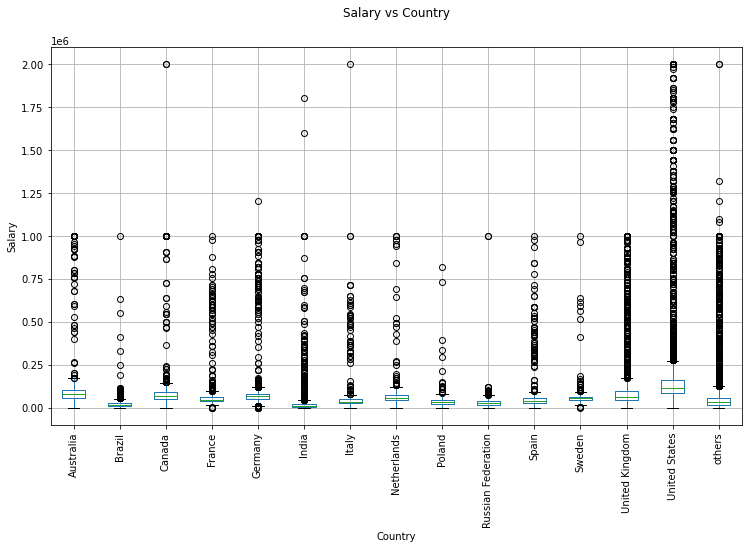

In [65]:
fig,ax=plt.subplots(1,1,figsize=(12,7))
column_needed.boxplot("Salary","Country",ax=ax)
plt.suptitle("Salary vs Country")
plt.ylabel("Salary")
plt.title("")
plt.xticks(rotation=90)
plt.show()

In [66]:
column_needed=column_needed[column_needed["Salary"]<=250000]
column_needed=column_needed[column_needed["Salary"]>10000]
column_needed=column_needed[column_needed["Country"]!="others"]


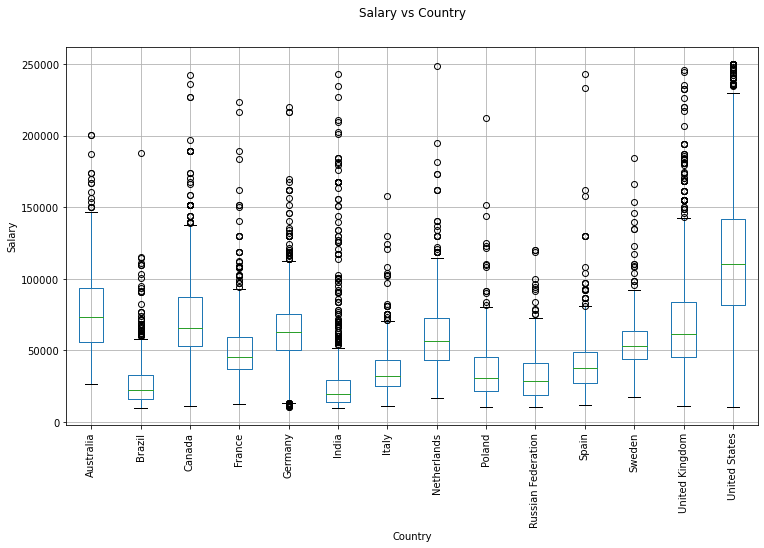

In [67]:
fig,ax=plt.subplots(1,1,figsize=(12,7))
column_needed.boxplot("Salary","Country",ax=ax)
plt.suptitle("Salary vs Country")
plt.ylabel("Salary")
plt.title("")
plt.xticks(rotation=90)
plt.show()

In [68]:
column_needed["YearsCodePro"].unique()

array(['13', '4', '2', '7', '20', '1', '3', '10', '12', '29', '6', '28',
       '8', '23', '15', '25', '9', '11', 'Less than 1 year', '5', '21',
       '16', '18', '14', '32', '19', '22', '38', '30', '26', '27', '17',
       '24', '34', '35', '33', '36', '40', '39', 'More than 50 years',
       '31', '37', '41', '45', '42', '44', '43', '50', '49'], dtype=object)

In [69]:
def clean_experience(x):
    if x=="More than 50 years":
        return 50
    if x=="Less than 1 year":
        return 0.5
    return float(x)

In [70]:
column_needed["YearsCodePro"]=column_needed["YearsCodePro"].apply(clean_experience)

In [71]:
column_needed["YearsCodePro"].unique()

array([13. ,  4. ,  2. ,  7. , 20. ,  1. ,  3. , 10. , 12. , 29. ,  6. ,
       28. ,  8. , 23. , 15. , 25. ,  9. , 11. ,  0.5,  5. , 21. , 16. ,
       18. , 14. , 32. , 19. , 22. , 38. , 30. , 26. , 27. , 17. , 24. ,
       34. , 35. , 33. , 36. , 40. , 39. , 50. , 31. , 37. , 41. , 45. ,
       42. , 44. , 43. , 49. ])

In [72]:
column_needed["EdLevel"].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'I never completed any formal education',
       'Primary/elementary school'], dtype=object)

In [73]:
def clean_education(x):
    if "Bachelor’s degree" in x:
        return "Bachelor’s degree" 
    if "Master’s degree" in x:
        return "Master’s degree"
    if "Professional degree" in x or "Other doctoral" in x:
            return "Post grad"
    return "Less than a Bachelors"

In [74]:
column_needed["EdLevel"]=column_needed["EdLevel"].apply(clean_education)

In [75]:
column_needed["EdLevel"].unique()

array(['Bachelor’s degree', 'Master’s degree', 'Less than a Bachelors',
       'Post grad'], dtype=object)

In [76]:
trans_edu=LabelEncoder()
trans_edu.fit(column_needed["EdLevel"])
column_needed["EdLevel"]=trans_edu.transform(column_needed["EdLevel"])

In [77]:
trans_count=LabelEncoder()
trans_count.fit(column_needed["Country"])
column_needed["Country"]=trans_count.transform(column_needed["Country"])

In [78]:
column_needed["Country"].unique()

array([13, 12, 10,  7,  4,  2,  6,  1,  3,  5, 11,  8,  0,  9])

In [79]:
features=column_needed.drop("Salary",axis=1)
target=column_needed["Salary"]

In [80]:
features.shape

(18489, 3)

In [81]:
X_train,X_test,Y_train,Y_test=train_test_split(features,target,test_size=0.15,random_state=2)

In [82]:
max_depth=[None,2,4,6,8,10,12]
parameters={"max_depth":max_depth,"max_features":[3]}
regressor=RandomForestRegressor(random_state=0)
search=GridSearchCV(regressor,parameters,scoring="neg_mean_squared_error")
search.fit(X_train,Y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12],
                         'max_features': [3]},
             scoring='neg_mean_squared_error')

In [83]:
search.best_params_

{'max_depth': 8, 'max_features': 3}

In [84]:
regressor=RandomForestRegressor(random_state=0,max_depth=8,max_features=3)
regressor.fit(X_train,Y_train)

RandomForestRegressor(max_depth=8, max_features=3, random_state=0)

In [85]:
train_pred=regressor.predict(X_train)
np.sqrt(mean_squared_error(Y_train,train_pred))

30214.412107087024

In [86]:
test_pred=regressor.predict(X_test)
np.sqrt(mean_squared_error(Y_test,test_pred))

30840.508458729575

In [87]:
test=np.array([["United States","Master’s degree",15]])
test

array([['United States', 'Master’s degree', '15']], dtype='<U15')

In [88]:
test[:,0]=trans_count.transform(test[:,0])

In [89]:
test[:,1]=trans_edu.transform(test[:,1])

In [90]:
regressor.predict(test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([144096.55476784])

In [91]:
model= LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [92]:
pickle.dump(model,open("model.pkl","wb"))